#### PART ONE

<b> Domain: </b> Healthcare

<b> CONTEXT: </b> Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

<b> DATA DESCRIPTION: </b> The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

<b> PROJECT OBJECTIVE: </b> Demonstrate the ability to fetch, process and leverage data to generate useful predictions
by training Supervised Learning algorithms.

<b> Steps and tasks:  </b>
#### 1. Import and warehouse data:
<br>
• Import all the given datasets and explore shape and size of each.
<br>
• Merge all datasets onto one and explore final shape and size.


In [4]:
# all imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from statistics import mean

from collections import Counter
%matplotlib inline

In [6]:
input_file_S = 'Part1 - Type_S.csv'
input_file_H = 'Part1 - Type_H.csv'
input_file_norm ='Part1 - Normal.csv'

data_S= pd.read_csv(input_file_S)
data_H= pd.read_csv(input_file_H)
data_N= pd.read_csv(input_file_norm)
data_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
P_incidence    150 non-null float64
P_tilt         150 non-null float64
L_angle        150 non-null float64
S_slope        150 non-null float64
P_radius       150 non-null float64
S_Degree       150 non-null float64
Class          150 non-null object
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [ ]:
data_H.info()

In [ ]:
data_N.info()

In [7]:
data = pd.concat([data_S,data_H,data_N])

In [ ]:
data.info() # data_S = 150 + data_H = 60 + data_N = 100 = 310 entries and no null values

In [ ]:
data.sample(15) # check sample of entries

#### 2. Data cleansing:
<br>
• Explore and if required correct the datatypes of each attribute
<br>
• Explore for null values in the attributes and if required drop or impute values

In [ ]:
data['Class'].unique() # check classification column

In [8]:
def clean_class(x):
    """
        This function scans through the series and returns 1 for Type S, 2 for Type_H, 3 for 'Normal' and 0 for other values
    
    """
    
    if x in ['Type_S', 'tp_s']:
        return 1
    elif x in ['Type_H', 'type_h']:
        return 2
    elif x in ['Normal', 'Nrmal']:
        return 3
    else:
        return 0
        
    
data['Class'] = data['Class'].apply(clean_class)
data['Class'].value_counts()

1    150
3    100
2     60
Name: Class, dtype: int64

#### 3. Data analysis & visualisation:
<br>
• Perform detailed statistical analysis on the data.
<br>
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

In [759]:
data.describe() # check the columns

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,1.838710
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.884852
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,1.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,1.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,2.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,3.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,3.000000


##### no null values across columns. 2 columns have negative values as min. Dataset is with class imbalance
##### S_Degree is right skewed. possible outliers.

In [760]:
corr = data.corr() # check correlation
corr

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,-0.537638
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,-0.348231
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,-0.525466
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,-0.430734
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.304099
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,-0.608705
Class,-0.537638,-0.348231,-0.525466,-0.430734,0.304099,-0.608705,1.000000


#### Strong positive correlation between P_incidence and S_slope, L_angle,P_tilt, S_Degree

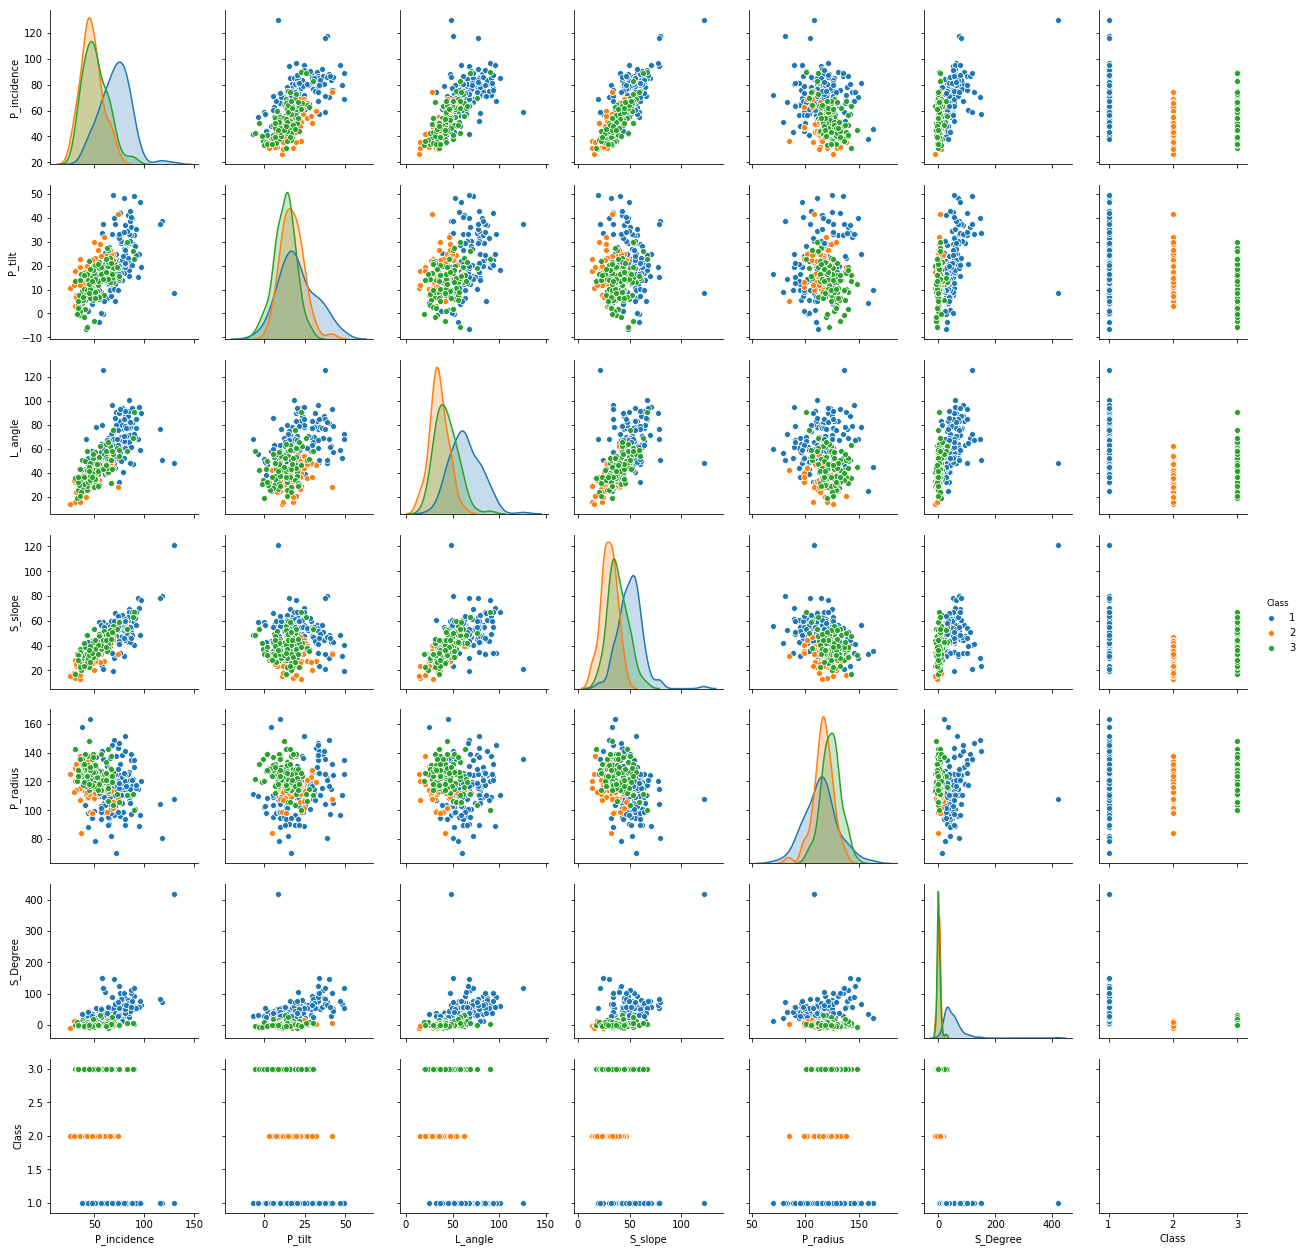

In [670]:
sns.pairplot(data,hue='Class') # check pairplot

p_incidence - higher values belong to Type_S
<br>
p_tilt has higher standard deviation for Type_S
<br>
L_angle - higher values belong ot Type_S
<br>
S_Degree - distribution looks quite different for Type_S

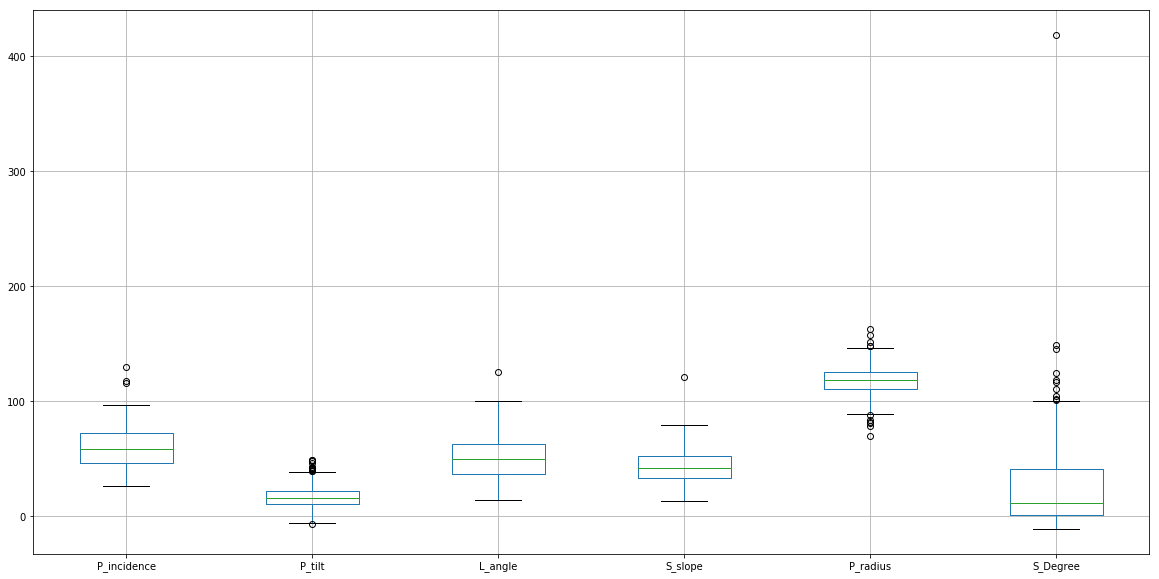

In [671]:
data.boxplot(column = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'], figsize = (20,10)) #check outliers

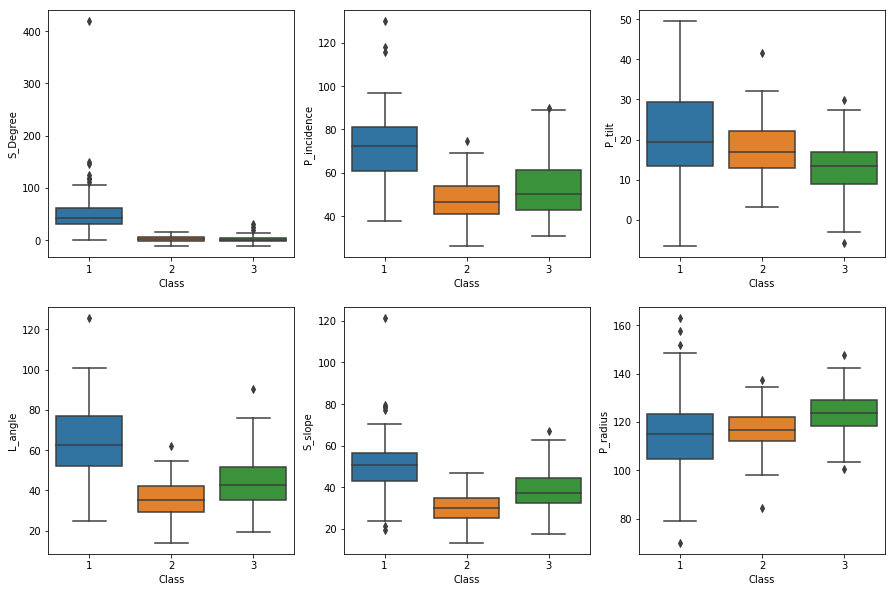

In [672]:
plt.figure(figsize=[15,10])
plt.subplot(2, 3, 1)
ax1=sns.boxplot(y='S_Degree',x = 'Class', data = data) # check outliers
plt.subplot(2, 3, 2)
ax2=sns.boxplot(y='P_incidence',x = 'Class', data = data) # check attributes that can split classes
plt.subplot(2, 3, 3)
ax3=sns.boxplot(y='P_tilt',x = 'Class', data = data) # check attributes that can split classes
plt.subplot(2, 3, 4)
ax4=sns.boxplot(y='L_angle',x = 'Class', data = data) # check attributes that can split classes
plt.subplot(2, 3, 5)
ax5=sns.boxplot(y='S_slope',x = 'Class', data = data) # check attributes that can split classes
plt.subplot(2, 3, 6)
ax6=sns.boxplot(y='P_radius',x = 'Class', data = data) # check attributes that can split classes

In [673]:
data[data['S_Degree']>400]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,1


In [674]:
data[data['P_incidence']>100]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,1
102,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,1
103,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,1


In [675]:
data[data['L_angle']>100]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
82,85.290173,18.278890,100.744220,67.011283,110.660700,58.884948,1
137,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,1


In [676]:
data[data['S_slope']>80]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
55,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,1


##### row 55,82,102,103 and 137 have extreme values. Interestingly all belong to Type_S
##### At present not taking any measures for outliers due to lack of subject knowledge. Also , 5 rows out of 310 rows and that too belonging to the majority class might not skew the KNN model

In [761]:
# Calculate median of dataset by group

median = data.groupby(['Class']).agg('median')
median

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
1,72.149306,19.309548,62.555200,50.751695,114.842400,42.372509
2,46.416169,16.949285,35.164873,30.000659,116.696146,2.542441
3,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710


##### 'S_Degree' could clearly differentiate Type_S from other 2 classes.
##### Type_H and Type_Normal looks tough to be separated. They also have low representation in the sample

#### 4. Data pre-processing:
<br>
• Segregate predictors vs target attributes
<br>
• Perform normalisation or scaling if required.
<br>
• Check for target balancing. Add your comments.
<br>
• Perform train-test split.

In [9]:
x = data.iloc[:,:-1] 
y= data.iloc[:,-1]

#As already mentioned, there is class imbalance in the dataset.
y.value_counts(sort=False)

1    150
2     60
3    100
Name: Class, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [764]:
print("Training Class splits\n Total: {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(y_train),((y_train==1).sum()/len(y_train))*100,((y_train==2).sum()/len(y_train))*100))
print("Testing Class splits\n Total:  {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(y_test),((y_test==1).sum()/len(y_test))*100,((y_test==2).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(y),((y==1).sum()/len(y))*100,((y==2).sum()/len(y))*100))

Training Class splits
 Total: 217 
 Type_S: (48.39)% 
 Type_H: (19.35)%
Testing Class splits
 Total:   93 
 Type_S: (48.39)% 
 Type_H: (19.35)%
Input data Class splits
 Total: 310 
 Type_S: (48.39)% 
 Type_H: (19.35)%


##### Try 1: check accuracy for data before scaling and applying other techniques

In [765]:
model = KNeighborsClassifier(n_neighbors=5) #use default value of 5
model.fit(x_train,y_train)

KNeighborsClassifier()

In [766]:
accuracy_train = model.score(x_train,y_train)
accuracy_train

0.8847926267281107

In [767]:
accuracy_test = model.score(x_test,y_test)
accuracy_test

0.7956989247311828

In [12]:
# Defining functions that could be used through the training process

def KNN_metrics(x_train,y_train,x_test,y_test,n_neighbors=5,weights='uniform'):
    """
    This function returns accuracy, confusion matrix, precision, recall, f1 score of the test dataset.
       
    """
    
    model = KNeighborsClassifier(n_neighbors, weights=weights) #use default value of 5
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_train = model.score(x_train,y_train)
    accuracy_test = model.score(x_test,y_test)
    
    #calculate metrics for each class 
    precision = metrics.precision_score(y_test,y_pred,average=None)
    recall = metrics.recall_score(y_test,y_pred,average=None)
    f1score = metrics.f1_score(y_test,y_pred,average=None)
    
    #create a dataframe for precision, recall and f1score
    metrics_array = np.column_stack((precision,recall,f1score))
    metrics_array = np.round_(metrics_array*100,decimals = 1)
    metrics_df = pd.DataFrame(metrics_array,columns=['Precision','Recall','F1score'],index = ['Type_S','Type_H','Normal'])
    
    cm = metrics.confusion_matrix(y_test,y_pred,labels = [1,2,3])
    
    return accuracy_train, accuracy_test, cm, metrics_df

def find_k(x_train,y_train,x_test,y_test,weights='uniform'):
    """
        This function finds the optimal K value and returns Optimal K and Mean Square Error for each K
        
    """
    MSE =[]
    test_accuracy=[]
    neighbors = list(range(1,16))

    for i in neighbors:
        model = KNeighborsClassifier(n_neighbors=i,weights=weights)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        test_accuracy.append(model.score(x_test,y_test)) # append testing accuracy for neighbors = i

        #calculate MSE
        MSE.append(1-test_accuracy[i-1])  

    optimal_k = MSE.index(min(MSE))+1
    return optimal_k,MSE

In [770]:
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train,y_train,x_test,y_test,n_neighbors=5,weights='uniform')
print("Train accuracy: {:.2%}".format(accuracy_train))
print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)

Train accuracy: 88.48%
Test accuracy: 79.57%
        Precision  Recall  F1score
Type_S       97.7    93.3     95.5
Type_H       61.5    44.4     51.6
Normal       64.9    80.0     71.6


Model tuning should improve above accuracy and metrics. Recall and Precision for Type_S is clearly high because of its representation in the sample as well as data separating Type_S very well

##### Try 2: Scale independent variables and check metrics

In [13]:
#Scale data as variables have different scales. Hence, scaling required for K-NN
scale = StandardScaler()
x=scale.fit_transform(data.iloc[:,:-1]) # scaled independent variables

#split scaled independent variables into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) 

print("Training Class splits\n Total: {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(y_train),((y_train==1).sum()/len(y_train))*100,((y_train==2).sum()/len(y_train))*100))
print("Testing Class splits\n Total:  {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(y_test),((y_test==1).sum()/len(y_test))*100,((y_test==2).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(y),((y==1).sum()/len(y))*100,((y==2).sum()/len(y))*100))

# call function to check metrics
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train,y_train,x_test,y_test,n_neighbors=5,weights='uniform')
print("Test accuracy:{:.2%}".format(accuracy_test))
print(metrics_df)

Training Class splits
 Total: 217 
 Type_S: (48.39)% 
 Type_H: (19.35)%
Testing Class splits
 Total:   93 
 Type_S: (48.39)% 
 Type_H: (19.35)%
Input data Class splits
 Total: 310 
 Type_S: (48.39)% 
 Type_H: (19.35)%
Test accuracy:79.57%
        Precision  Recall  F1score
Type_S       90.9    88.9     89.9
Type_H       68.8    61.1     64.7
Normal       69.7    76.7     73.0


Scaling is required for KNN as columns are on different scales. Precision and Recall for Type_H have improved and Precision of Normal has improved after scaling

#### 5. Model training, testing and tuning:
<br>
• Design and train a KNN classifier.
<br>
• Display the classification accuracies for train and test data.
<br>
• Display and explain the classification report in detail.
<br>
• Automate the task of finding best values of K for KNN.
<br>
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.

##### Try 3: Identify best K for scaled data and check metrics

In [18]:
from sklearn.tree import DecisionTreeClassifier
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

print(pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"]))

        Imp
0  0.000000
1  0.013771
2  0.000000
3  0.113634
4  0.083531
5  0.789064


In [772]:
# find best K for scaled data
optimal_k,MSE = find_k(x_train,y_train,x_test,y_test)
print("Optimal K = {0:2d}, Accuracy = {1:.2f}%".format(optimal_k,(1-min(MSE))*100))

Optimal K =  5, Accuracy = 79.57%


In [729]:
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train,y_train,x_test,y_test,n_neighbors=5,weights='uniform')

print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)
cm

Test accuracy: 79.57%
        Precision  Recall  F1score
Type_S       90.9    88.9     89.9
Type_H       68.8    61.1     64.7
Normal       69.7    76.7     73.0


array([[40,  1,  4],
       [ 1, 11,  6],
       [ 3,  4, 23]], dtype=int64)

#### Optimal n_neighbors value is 5 and Accuracy is 79.6% for scaled data.

##### Type_S has higher values for all metrics compared to other classes because of class imbalance and data separating that class well

##### Try 4: Change weights to Distance and check metrics

In [773]:
optimal_k,MSE = find_k(x_train,y_train,x_test,y_test,weights='distance')
print("Optimal K = {0:2d}, Accuracy = {1:.2f}%".format(optimal_k,(1-min(MSE))*100))
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train,y_train,x_test,y_test,n_neighbors=optimal_k,weights='distance')
print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)

Optimal K = 10, Accuracy = 81.72%
Test accuracy: 81.72%
        Precision  Recall  F1score
Type_S       95.2    88.9     92.0
Type_H       90.0    50.0     64.3
Normal       65.9    90.0     76.1


Overall accuracy has improved. Precision of 'Type_H' and Recall of 'Normal' improved considerably

##### Try 5: Select features

In [774]:
# Hold S_degree within x_train and add one more attribute. S_degree does well in differentiating Type_S
# Doing this as many attributes are correlated in the given input set

for i in range(0,x_train.shape[1]-1):
    x_train1 = np.column_stack((x_train[:,i],x_train[:,-1]))
    x_test1 = np.column_stack((x_test[:,i],x_test[:,-1]))
    optimal_k,MSE = find_k(x_train1,y_train,x_test1,y_test,weights='uniform')
    print("Optimal K = {0:2d}, Accuracy = {1:.2f}%, Training columns= (S_degree,{2})".format(optimal_k,(1-min(MSE))*100,data.columns[i]))               

Optimal K =  4, Accuracy = 77.42%, Training columns= (S_degree,P_incidence)
Optimal K =  6, Accuracy = 79.57%, Training columns= (S_degree,P_tilt)
Optimal K =  3, Accuracy = 81.72%, Training columns= (S_degree,L_angle)
Optimal K =  6, Accuracy = 83.87%, Training columns= (S_degree,S_slope)
Optimal K =  5, Accuracy = 80.65%, Training columns= (S_degree,P_radius)


In [775]:
# for i =3, test accuracy is high. S_degree and S_slope alone gives better acccuracy
x_train1=np.column_stack((x_train[:,3],x_train[:,-1]))
x_test1 = np.column_stack((x_test[:,3],x_test[:,-1]))
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train1,y_train,x_test1,y_test,n_neighbors=6,weights='uniform')
print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)

Test accuracy: 83.87%
        Precision  Recall  F1score
Type_S       97.8    97.8     97.8
Type_H       63.2    66.7     64.9
Normal       75.9    73.3     74.6


Recall of Type_H and Precision of Normal improved when compared to scaled model (Try 3). Overall Accuracy is high

In [776]:
# check metrics for weights = 'distance'
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train1,y_train,x_test1,y_test,n_neighbors=6,weights='distance')
print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)

Test accuracy: 80.65%
        Precision  Recall  F1score
Type_S       97.8    97.8     97.8
Type_H       56.2    50.0     52.9
Normal       68.8    73.3     71.0


In [777]:
# Keep S_degree and S_slope. Check if any other feature is improving the model
for i in range(0,x_train.shape[1]-1):
    if i != 3:
        x_train1 = np.column_stack((x_train[:,i],x_train[:,3],x_train[:,-1]))
        x_test1 = np.column_stack((x_test[:,i],x_test[:,3],x_test[:,-1]))
        optimal_k,MSE = find_k(x_train1,y_train,x_test1,y_test,weights='uniform')
        print("Optimal K = {0:2d}, Accuracy = {1:.2f}%, i = {2:2d}".format(optimal_k,(1-min(MSE))*100,i))       

Optimal K =  6, Accuracy = 80.65%, i =  0
Optimal K = 12, Accuracy = 80.65%, i =  1
Optimal K =  5, Accuracy = 79.57%, i =  2
Optimal K = 15, Accuracy = 87.10%, i =  4


S_degree,S_slope and P_radius columns together give better results

In [779]:
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train1,y_train,x_test1,y_test,n_neighbors=15,weights='uniform')

print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)
cm

Test accuracy: 87.10%
        Precision  Recall  F1score
Type_S       95.6    95.6     95.6
Type_H       90.9    55.6     69.0
Normal       75.7    93.3     83.6


array([[43,  0,  2],
       [ 1, 10,  7],
       [ 1,  1, 28]], dtype=int64)

In [780]:
# Keep S_degree, S_slope and P_radius. Check if any other feature is improving the model
for i in range(0,x_train.shape[1]-1):
    if i not in [3,4]:
        x_train1 = np.column_stack((x_train[:,i],x_train[:,3],x_train[:,4],x_train[:,-1]))
        x_test1 = np.column_stack((x_test[:,i],x_test[:,3],x_test[:,4],x_test[:,-1]))
        optimal_k,MSE = find_k(x_train1,y_train,x_test1,y_test,weights='uniform')
        print("Optimal K = {0:2d}, Accuracy = {1:.2f}%, i = {2:2d}".format(optimal_k,(1-min(MSE))*100,i))   

Optimal K = 13, Accuracy = 86.02%, i =  0
Optimal K = 14, Accuracy = 82.80%, i =  1
Optimal K =  8, Accuracy = 81.72%, i =  2


Adding features is not further improving the model.

##### Try 6: Tackle class imbalance by oversampling using SMOTE() 

In [781]:
sm = SMOTE(random_state=1) # call SMOTE to resample minority classes in the training dataset
xr_train, yr_train = sm.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(yr_train))

Resampled dataset shape Counter({3: 105, 1: 105, 2: 105})


In [782]:
# check class proportions in training and testing datasets
print("Training Class splits\n Total: {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(yr_train),((yr_train==1).sum()/len(yr_train))*100,((yr_train==2).sum()/len(yr_train))*100))
print("Testing Class splits\n Total:  {0:3d} \n Type_S: ({1:.2f})% \n Type_H: ({2:.2f})%".format(len(y_test),((y_test==1).sum()/len(y_test))*100,((y_test==2).sum()/len(y_test))*100))

Training Class splits
 Total: 315 
 Type_S: (33.33)% 
 Type_H: (33.33)%
Testing Class splits
 Total:   93 
 Type_S: (48.39)% 
 Type_H: (19.35)%


In [783]:
# find best k for oversampled training data
optimal_k,MSE = find_k(xr_train,yr_train,x_test,y_test,weights='uniform')
print("Optimal K = {0:2d}, Accuracy = {1:.2f}%".format(optimal_k,(1-min(MSE))*100))

Optimal K =  1, Accuracy = 78.49%


In [784]:
# get metrics for optimal K
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(xr_train,yr_train,x_test,y_test,n_neighbors=optimal_k,weights='uniform')
print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)

Test accuracy: 78.49%
        Precision  Recall  F1score
Type_S       88.9    88.9     88.9
Type_H       68.8    61.1     64.7
Normal       68.8    73.3     71.0


In [785]:
# get metrics weights = 'distance'
optimal_k,MSE = find_k(xr_train,yr_train,x_test,y_test,weights='distance')
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(xr_train,yr_train,x_test,y_test,n_neighbors=optimal_k,weights='distance')
print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)

Test accuracy: 78.49%
        Precision  Recall  F1score
Type_S       88.9    88.9     88.9
Type_H       68.8    61.1     64.7
Normal       68.8    73.3     71.0


In [786]:
##### lets drop other features and just include S_degree,P_radius,S_slope and try for oversampled data
xr_train1=np.column_stack((xr_train[:,3],xr_train[:,4],xr_train[:,-1]))
x_test1 = np.column_stack((x_test[:,3],x_test[:,4],x_test[:,-1]))
optimal_k,MSE = find_k(xr_train1,yr_train,x_test1,y_test,weights='uniform')
print("Optimal K = {0:2d}, Accuracy = {1:.2f}%".format(optimal_k,(1-min(MSE))*100))

Optimal K =  4, Accuracy = 87.10%


In [787]:
# get metrics for optimal K and features 'S_slope','S_Degree'
accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(xr_train1,yr_train,x_test1,y_test,n_neighbors=optimal_k,weights='uniform')
print("Test accuracy: {:.2%}".format(accuracy_test))
print(metrics_df)

Test accuracy: 87.10%
        Precision  Recall  F1score
Type_S      100.0    95.6     97.7
Type_H       70.0    77.8     73.7
Normal       80.0    80.0     80.0


##### So far, the 2 solutions below have done well
<br>
Approach 1: Model with just S_degree, S_slope and P_radius has given accuracy of 87.1% with better precision and recall.(k=15)
<br>
Approach 2: Model with just S_degree, S_slope and P_radius with oversampling using SMOTE() has given accuracy of 87.1% with better metrics. (k=4)

##### Try 7: Perform Cross-Validation

In [805]:
# Perform cross validation
def cross_validation(x,y,synthetic = False):
    """
        This function performs cross validation using StratifiedKFold. Splits the dataset into 4 for every K and calculates average accuracy 
        for every K. It finds out the optimal K value that has higher average accuracy for the folds
        
        If synthetic == True, synthetic data is added to training dataset using SMOTE() function.
        
        Returns None
        Prints Accuracy, metrics and plots graph (K vs MSE)
    """
    k_range = range(1, 20)
    k_accuracy = []
    k_precision=pd.DataFrame(index = ['Type_S','Type_H','Normal'])
    k_recall=pd.DataFrame(index = ['Type_S','Type_H','Normal'])
    k_f1score=pd.DataFrame(index = ['Type_S','Type_H','Normal'])

    # Using StratifiedKFold for cross validation. Stratified to keep class in similar proprotions in train and test
    cv=StratifiedKFold(n_splits=4)

    # assign synthetic data object.
    if synthetic == True:
        sm = SMOTE(random_state=1) # call SMOTE to resample minority classes in the training dataset
        
        
    
    for k in k_range:
        # initialize
        avg_accuracy=[]
        avg_precision=pd.DataFrame(index = ['Type_S','Type_H','Normal'])
        avg_recall=pd.DataFrame(index = ['Type_S','Type_H','Normal'])
        avg_f1score=pd.DataFrame(index = ['Type_S','Type_H','Normal'])

        for train_index, test_index in cv.split(x, y): 
                x_train, x_test = x[train_index], x[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                if synthetic == True:
                    x_train, y_train = sm.fit_resample(x_train, y_train) # add synthetic data to minority classes
                                
                #get metrics
                accuracy_train, accuracy_test, cm, metrics_df = KNN_metrics(x_train,y_train,x_test,y_test,n_neighbors=k,weights='uniform')
                # append metrics
                avg_accuracy.append(accuracy_test)
                
                # Below metrics contain classes in rows as index and adds metrics values to columns for each training dataset.
                #            Precision-Trainingset-1    Precision-Trainingset-2   Precision-Trainingset-3
                # class = 1    80.3                               75.4                83.2
                # class = 2    66.5                               65.2                66.1 
                # class = 3    75.0                               74.1                73.1
                avg_precision=pd.concat([avg_precision,metrics_df['Precision']],axis=1) 
                avg_recall=pd.concat([avg_recall,metrics_df['Recall']],axis=1)
                avg_f1score=pd.concat([avg_f1score,metrics_df['F1score']],axis=1)
                
        # For a given K, calculate average of metrics for various splits
        k_accuracy.append(mean(avg_accuracy))

        # Below metrics contain classes in rows as index and adds metrics values to columns for each K values
        #               K=1    K=2   K=3
        # class = 1    80.3    75.4  83.2
        # class = 2    66.5    65.2  66.1 
        # class = 3    75.0    74.1  73.1
        k_precision = pd.concat([k_precision,avg_precision.mean(axis=1)],axis=1)
        k_recall = pd.concat([k_recall,avg_recall.mean(axis=1)],axis=1)
        k_f1score = pd.concat([k_f1score,avg_f1score.mean(axis=1)],axis=1)

    print("Best accuracy {:.2%}".format(max(k_accuracy)))
    print("Optimal K value", k_accuracy.index(max(k_accuracy))+1)
    
    metrics_df = pd.concat([k_precision.mean(axis=1),k_recall.mean(axis=1),k_f1score.mean(axis=1)],axis=1)
    metrics_df.columns = ['Precision','Recall','F1score']
    print(metrics_df)
    
    #plot to see clearly
    plt.plot(k_range, k_accuracy)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Accuracy')
    plt.show()



Best accuracy 83.90%
Optimal K value 3
        Precision     Recall    F1score
Type_S  92.990789  92.805263  92.876316
Type_H  65.359211  63.155263  62.844737
Normal  74.803947  74.368421  73.711842


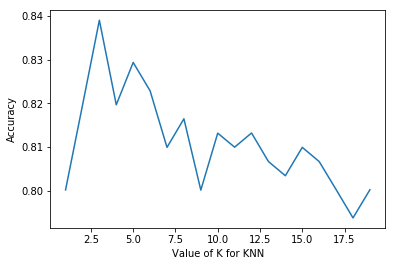

In [806]:
# Cross validate model from Try 5 - pass only S_degree, P_radius and S_slope to the model
y_cv = np.array(y)
x_cv=np.column_stack((x[:,3],x[:,4],x[:,-1])) # use S_degree, S_slope and P_radius
cross_validation(x_cv,y_cv)

#####  Model 1: Accuracy peaks at K = 3 during cross validation and  Accuracy is at 83.9%. 

Best accuracy 79.71%
Optimal K value 10
        Precision     Recall    F1score
Type_S  90.268421  88.202632  89.182895
Type_H  65.389474  64.560526  63.869737
Normal  70.115789  71.000000  69.767105


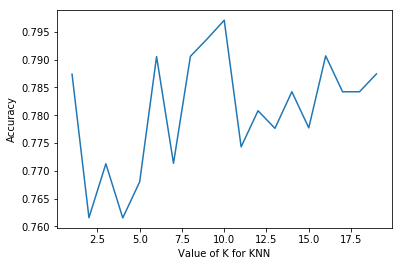

In [807]:
# Follow the same cross validation for base model [ contains all columns of x and scaled using standard scaler ]

y_cv = np.array(y)
x_cv = x 
cross_validation(x_cv,y_cv)

#####  Model 2: Accuracy peaks at K = 10 during cross validation and  Accuracy is at 79.7%. 

Best accuracy 78.74%
Optimal K value 2
        Precision     Recall    F1score
Type_S  92.394737  85.026316  88.490789
Type_H  56.660526  80.523684  65.786842
Normal  72.198684  60.947368  65.425000


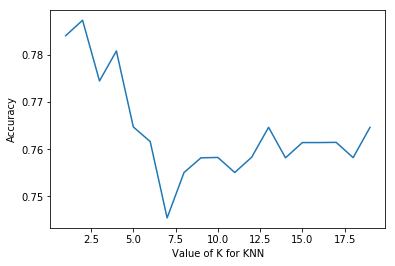

In [808]:
# Follow the same cross validation for oversampling

y_cv = np.array(y)
x_cv = x 
cross_validation(x_cv,y_cv,synthetic = True)

#####  Model 3: Accuracy peaks at K = 2 during cross validation and  Accuracy is at 78.7%.

Training with synthetic data has improved Recall of Type_H but overall accuracy and rest of the metrics have gone down when compared to model 1.

Best accuracy 83.25%
Optimal K value 4
        Precision     Recall    F1score
Type_S  95.560526  90.332895  92.840789
Type_H  58.892105  78.248684  66.656579
Normal  78.543421  67.947368  72.261842


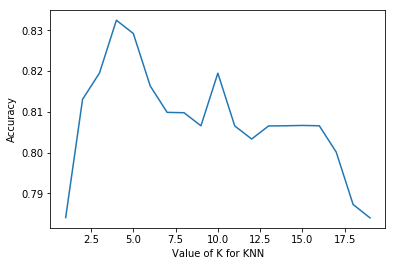

In [809]:
# Follow the same cross validation for oversampling using just the 3 columns

y_cv = np.array(y)
x_cv = np.column_stack((x[:,3],x[:,4],x[:,-1])) # use S_degree, P_radius, S_slope
cross_validation(x_cv,y_cv,synthetic = True)

#####  Model 4: Accuracy peaks at K = 4 during cross validation and  Accuracy is at 83.3%.

##### 6. Conclusion and improvisation:
<br>
• Write your conclusion on the results.
<br>
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected

Across models, Accuracies are ranging from 78.7% to 83.9% for various values of K during cross validation. The table below summarises positives for each of the four models.

|Pros |Model 1 (Reduced features) | Model 2 (All input variables ) | Model 3 (All input variables and SMOTE)|Model 4 (Reduced Features and SMOTE)|
| :----- | :---- | :---- | :---- | :---- |
|Overall Accuracy (cv)|83.9%|79.7%|78.7%|83.3%|
|Optimal K (cv)|3|10|2|4|
|Pros | Highest overall Accuracy,Simpler model with less features|Highest precision for Type_H | Lower value for Optimal K,Highest recall rate for Type_H|Simpler model with less number of features, Higher overall accuracy, High precision for Type_S and Normal|


To make further decision, subject knowledge is required as dropping features cannot be done without subject knowledge. Also, if Type_H is very important, then Model 2 or Model 3 needs to be prioritised. A decision can be taken after consulting with subject matter expert.

##### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected


1. In the column 'Class', there was no standard for the 3 types of classes. Introducing a standard way of storing it would reduce effort while cleaning up
<br>
2. There are class imbalances in the data. Oversampling could be done for under-represented classes so that model can be trained on actual data rather than synthetic data
<br>
3. There were some extreme values (ex: row 55) in the data. Some cross checks are required to see if they are actually valid values

#### PART TWO

<b> DOMAIN: </b> Banking and finance

<b> CONTEXT: </b> A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.

<b> DATA DESCRIPTION: </b> The data consists of the following attributes:

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

<b> PROJECT OBJECTIVE: </b> Build an AIML model to perform focused marketing by predicting the potential customers who will
convert using the historical dataset.

##### 1. Import and warehouse data:
<br>
• Import all the given datasets and explore shape and size of each.
<br>
• Merge all datasets onto one and explore final shape and size.

In [810]:
# all imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB

%matplotlib inline

In [811]:
# read input files 
input_file_1 = 'Part2 - Data1.csv'
input_file_2 = 'Part2 -Data2.csv'

data_1= pd.read_csv(input_file_1)
data_2 = pd.read_csv(input_file_2)

In [812]:
data_1.info(),data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
ID                     5000 non-null int64
Age                    5000 non-null int64
CustomerSince          5000 non-null int64
HighestSpend           5000 non-null int64
ZipCode                5000 non-null int64
HiddenScore            5000 non-null int64
MonthlyAverageSpend    5000 non-null float64
Level                  5000 non-null int64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
ID                     5000 non-null int64
Mortgage               5000 non-null int64
Security               5000 non-null int64
FixedDepositAccount    5000 non-null int64
InternetBanking        5000 non-null int64
CreditCard             5000 non-null int64
LoanOnCard             4980 non-null float64
dtypes: float64(1), int64(6)
memory usage: 273.5 KB


(None, None)

In [813]:
data_1.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
1578,1579,38,13,12,94143,2,0.3,2
4076,4077,49,23,22,92220,1,0.3,3
2465,2466,58,34,25,90059,2,0.3,1
1716,1717,32,8,200,91330,2,6.5,1
900,901,30,4,51,94709,4,0.2,1


In [814]:
data_2.sample(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
3251,3252,0,0,0,0,1,0.0
4402,4403,207,1,0,0,0,0.0
1286,1287,0,0,0,0,1,0.0
2684,2685,129,1,1,1,1,0.0
725,726,0,0,0,0,0,0.0


In [815]:
# join both datasets on ID. Full outer join
data_1.set_index(['ID'],inplace=True)
data_2.set_index(['ID'],inplace=True)

data = data_1.join(data_2,how='outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                    5000 non-null int64
CustomerSince          5000 non-null int64
HighestSpend           5000 non-null int64
ZipCode                5000 non-null int64
HiddenScore            5000 non-null int64
MonthlyAverageSpend    5000 non-null float64
Level                  5000 non-null int64
Mortgage               5000 non-null int64
Security               5000 non-null int64
FixedDepositAccount    5000 non-null int64
InternetBanking        5000 non-null int64
CreditCard             5000 non-null int64
LoanOnCard             4980 non-null float64
dtypes: float64(2), int64(11)
memory usage: 706.9 KB


Shape of the resultant dataframe is (5000,13) with ID set as index of dataframe

##### 2. Data cleansing:
<br>
• Explore and if required correct the datatypes of each attribute
<br>
• Explore for null values in the attributes and if required drop or impute values.

In [816]:
#check for nulls
data.isnull().sum()   # LoanOnCard has some null values.

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [817]:
# check relationship between 'CreditCard' and 'LoanOnCard' using crosstabs before taking action for nulls
row = data['LoanOnCard']
column = data['CreditCard']
pd.crosstab(row,column)

CreditCard,0,1
LoanOnCard,,
0.0,3177,1323
1.0,337,143


People who don't have bank's credit card have LoanOnCard set to True. So, 'LoanOnCard' includes other bank cards as well

In [818]:
# take a copy of the original dataset
p_data = data.copy()

In [819]:
#'Since LoanOnCard' is target variable, drop rows that has null values
p_data.dropna(inplace=True)
p_data.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [820]:
p_data['ZipCode'].nunique() # check ZipCode categorical variable.

467

"HiddenScore" and "Level" are categorical variables. But treating them as continuous

##### 3. Data analysis & visualisation:
<br>
• Perform detailed statistical analysis on the data.
<br>
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [821]:
# get 7 point analysis on data
p_data.describe()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,2.395582,1.939536,1.880924,56.589759,0.104418,0.060643,0.597189,0.294378,0.096386
std,11.464212,11.468716,46.07009,2123.660073,1.147200,1.750006,0.840144,101.836758,0.305832,0.238697,0.490513,0.455808,0.295149
min,23.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,3.000000,2.525000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.00000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. 'CustomerSince' has negative values. Might be there is a reference year which is 0.
2. ZipCode is 'Categorical' variable but stored as integer
3. Looks like 'HiddenScore' is categorical with values = 1,2,3,4
4. 'Level' is categorical with values = 1,2,3
5. 50 percentile customers don't have a mortgage
6. 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'  are categorical with values = 0,1
7. Atleast 75% don't have a 'Security' asset with the bank
8. Atleast 75% don't have FixedDepositAccount with the bank
9. Atleast 25% don't have InternetBanking account with the bank
10. Atleast 50% don't have CreditCard
11. Atleast 75% don't have LoanOnCard

In [822]:
p_data['LoanOnCard'].value_counts() # 90.4% no 'LoanOnCard'

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

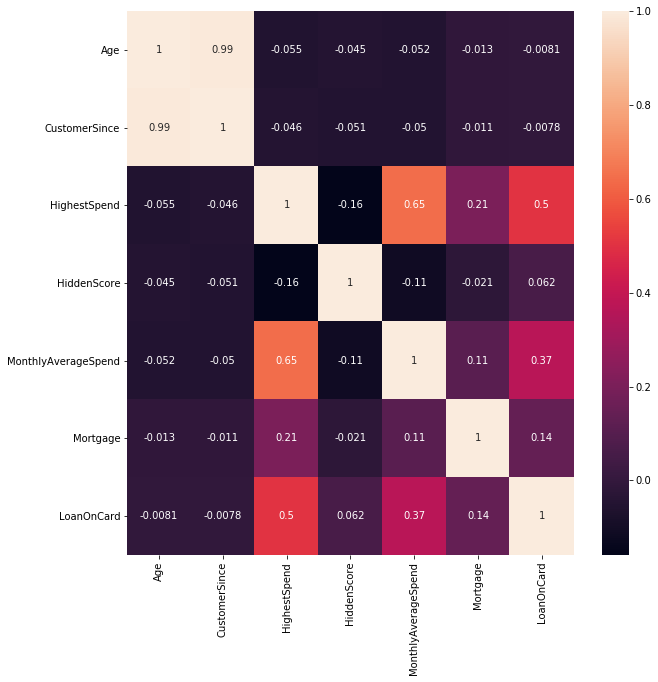

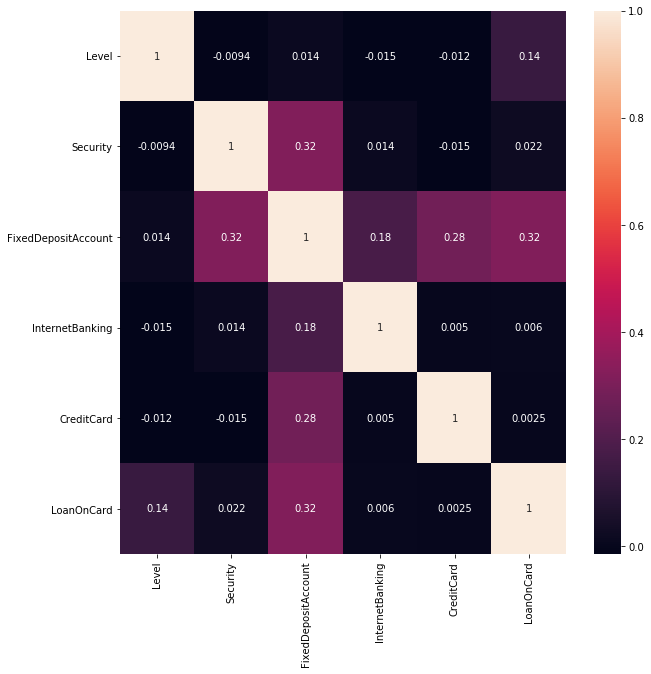

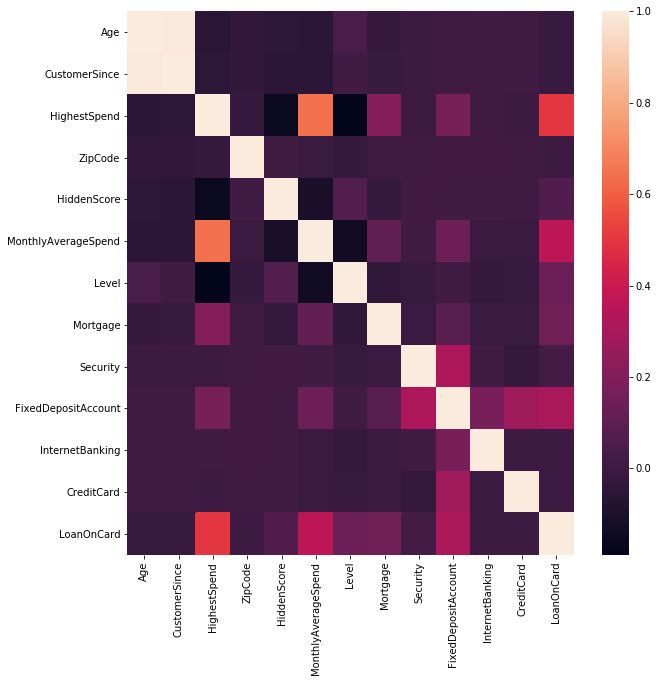

In [823]:
# Splitting data to check correlations with "LoanOnCard"
p_data_1 = p_data[['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend','Mortgage','LoanOnCard']]
p_data_2 = p_data[['Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']]
corr1=p_data_1.corr()
corr2=p_data_2.corr()
plt.figure(figsize=[10,10])
sns.heatmap(corr1,annot=True)
plt.figure(figsize=[10,10])
sns.heatmap(corr2,annot=True)
plt.figure(figsize=[10,10])
sns.heatmap(p_data.corr(),annot=False)

1. 'LoanOnCard' has high positive correlation with 'HighestSpend', 'MonthlyAverageSpend'
2. 'HighestSpend', 'MonthlyAverageSpend' are positively correlated
3. 'Age' and 'CustomerSince' exhibit strong positive correlation, while 'CustomerSince' has negative values. Not sure about how 'CustomerSince' value is calculated

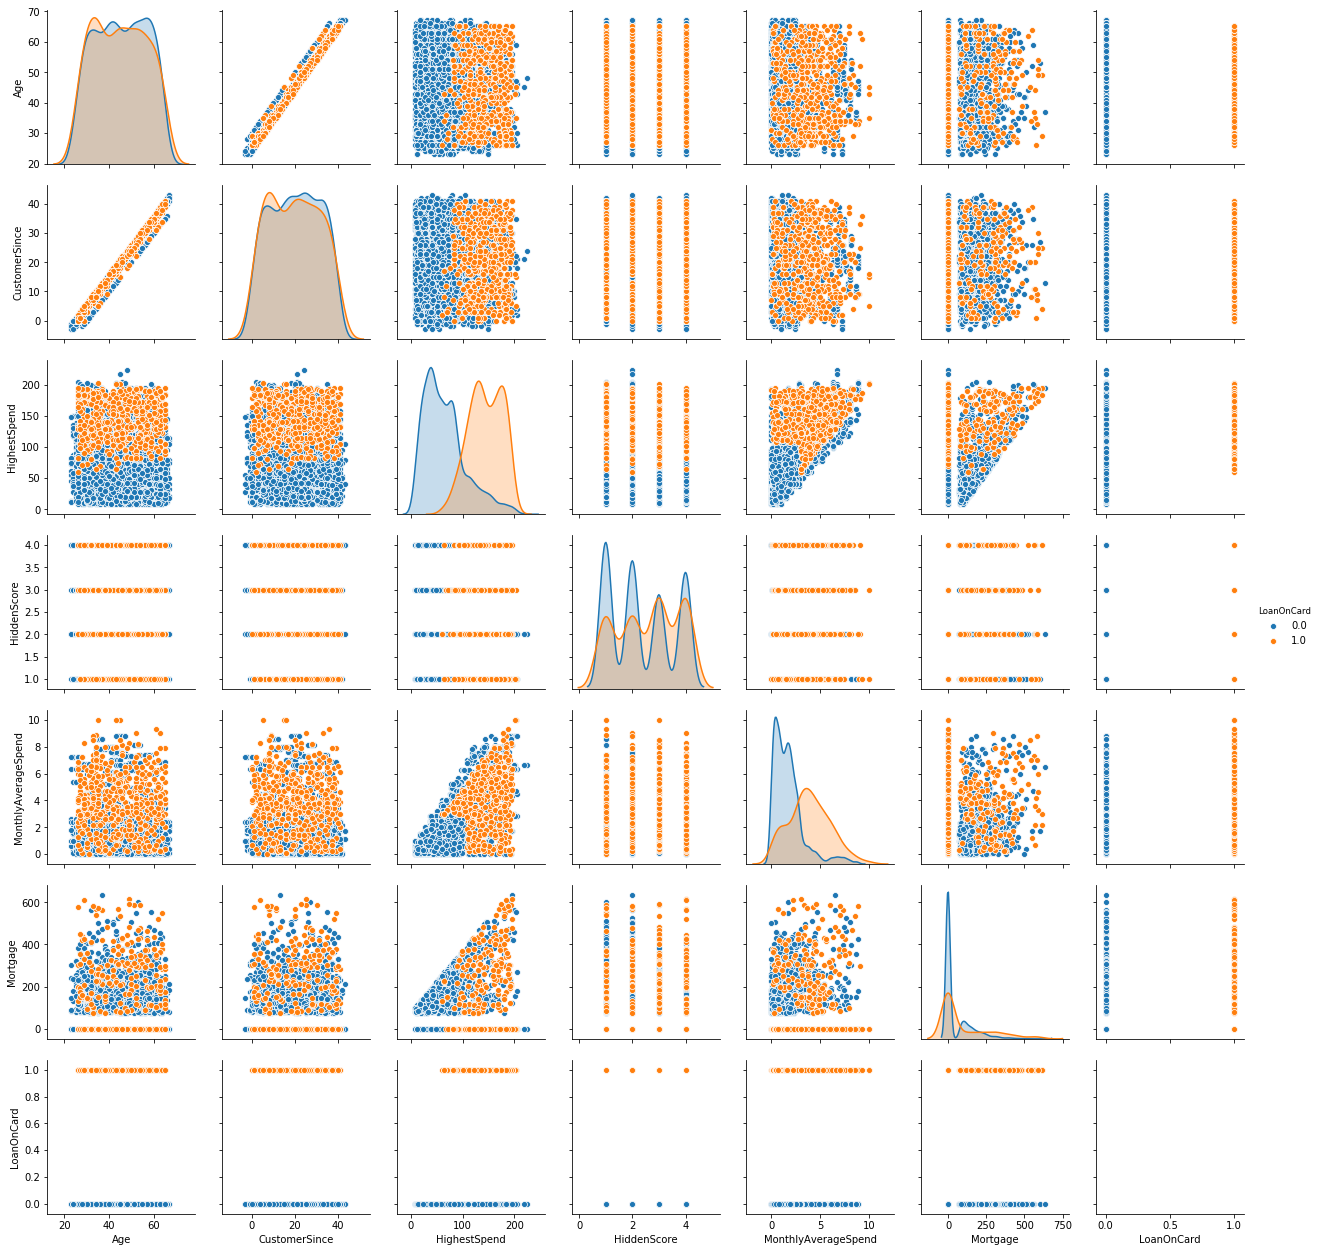

In [824]:
sns.pairplot(p_data_1,diag_kind= 'kde', hue='LoanOnCard')

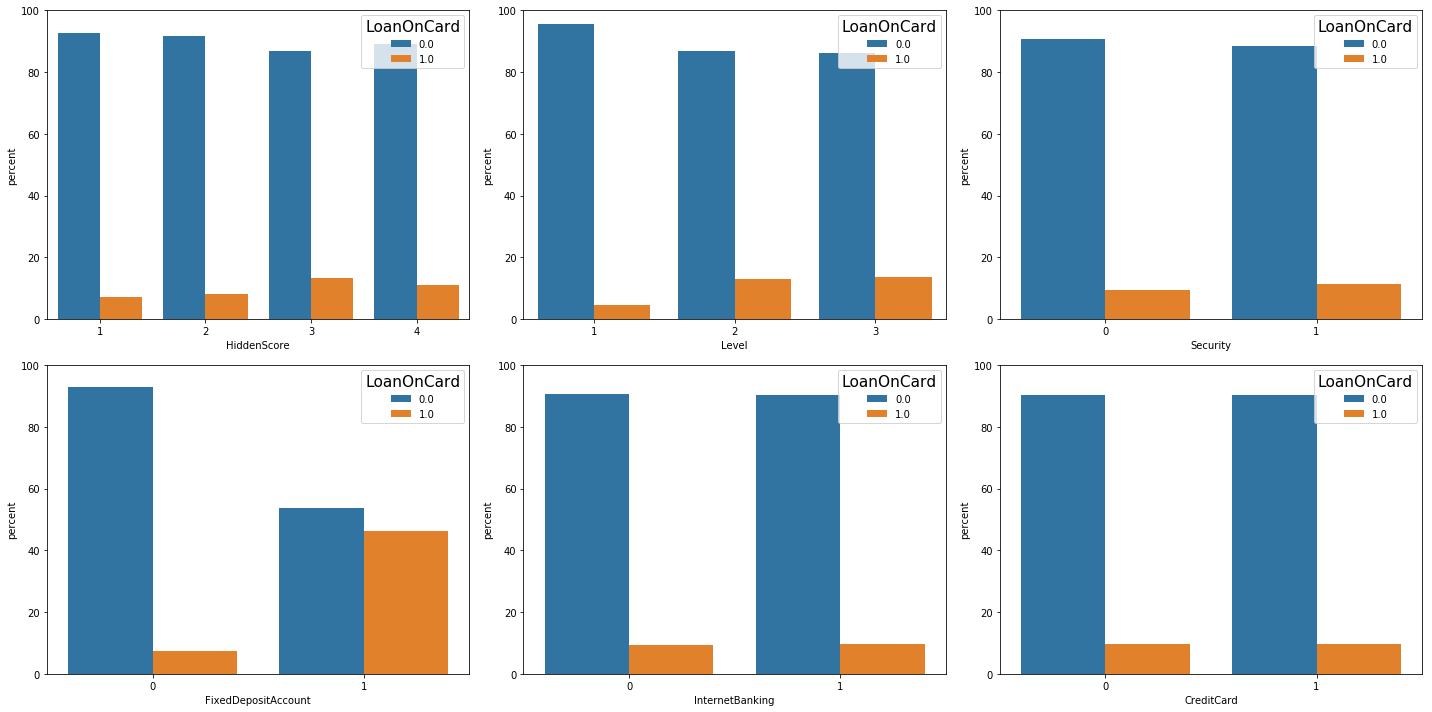

In [825]:
# Plot categorical variables as percentage based on 'LoanOnCard'. This can give an idea on which attribute can predict 'LoanOnCard' better

categorical = ['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking', 'CreditCard']

fig, axs = plt.subplots(2,3,figsize=(20,10))

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels


for i in range(0,len(categorical)):
    
    x=categorical[i] # x axis: Loops through every categorical variable
    
    # set position of subplot using mod operator
    position = (i+1)%3
    if  position ==0:
        position = 3 # if 3rd position, mod will be 0. Set it to 3.
    
    # set row of subplot using i
    if i <3:
        row = 0
    else:
        row = 1
    
    # below expression calculates percentage and creates a df for the categorical variable
    df = p_data.groupby(x)['LoanOnCard'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    
    sns.barplot(ax = axs[row,position-1],
                x= x,
                y = "percent",
                hue="LoanOnCard",
                data=df)
    axs[row,position-1].set_ylim(0,100)
    plt.tight_layout()
    
plt.show()

##### 1. Having a "FixedDepositAccount" might have a relation with "LoanOnCard"
##### 2. Higher values of "HiddenScore" (3,4) and "Level" (2,3) might have a relation with "LoanOnCard"

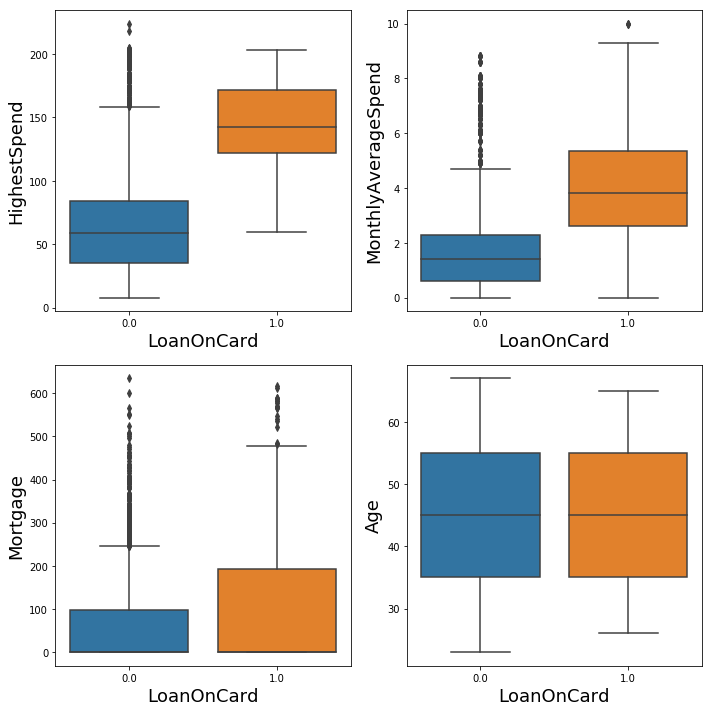

In [826]:
# Look at spread of continuous variables
continuous = ['HighestSpend','MonthlyAverageSpend','Mortgage', 'Age']

fig, axs = plt.subplots(2,2,figsize=(10,10))

plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)     # fontsize of the x and y labels

for i in range(0,len(continuous)):
    
    y=continuous[i]
    
    # set position of subplot using mod operator
    position = (i+1)%2
    if  position ==0:
        position = 2 # if 2nd position, mod will be 0. Set it to 2.

    # set row of subplot using i
    if i <2:
        row = 0
    else:
        row = 1
    
    sns.boxplot(ax = axs[row,position-1],
                y = y,
                x="LoanOnCard",
                data=p_data)
    plt.tight_layout()
    
plt.show()

##### 1. 'Age' doesn't seem to have much influence on 'LoanOnCard'
##### 2. Median 'HighestSpend' is quite high for people with 'LoanOnCard'
##### 3. Median 'MonthlyAverageSpend' is quite high for people with 'LoanOnCard'
##### 4. 'Mortgage' is right skewed and both people with "LoanOnCard" and who dont have "LoanOnCard" have mortgages

##### 4. Data pre-processing:
<br>
• Segregate predictors vs target attributes
<br>
• Check for target balancing and fix it if found imbalanced.
<br>
• Perform train-test split.

In [827]:
y = p_data['LoanOnCard']
#'CustomerSince' has very high positive correlation with 'Age'. So dropping it from predictors due to observations on that variable
# 'ZipCode' is categorical data with 467 unique values. If ZipCodes are grouped into 3-4 categories based on some wealth indicators
# then adding it into the model makes sense. Hence, dropping ZipCode as well from predictors

x = p_data[['Age','HighestSpend','HiddenScore','MonthlyAverageSpend','Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 10 to 5000
Data columns (total 10 columns):
Age                    4980 non-null int64
HighestSpend           4980 non-null int64
HiddenScore            4980 non-null int64
MonthlyAverageSpend    4980 non-null float64
Level                  4980 non-null int64
Mortgage               4980 non-null int64
Security               4980 non-null int64
FixedDepositAccount    4980 non-null int64
InternetBanking        4980 non-null int64
CreditCard             4980 non-null int64
dtypes: float64(1), int64(9)
memory usage: 588.0 KB


In [828]:
# check target balancing
print("LoanOnCard = 0: {:.2%}".format(y.value_counts()[0]/len(y)))
print("LoanOnCard = 1: {:.2%}".format(y.value_counts()[1]/len(y)))

LoanOnCard = 0: 90.36%
LoanOnCard = 1: 9.64%


###### Only around 10% have "LoanOnCard". This is a highly skewed target variable

In [829]:
# Perform train_test_split using stratify option
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify = y)
print("Training Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_train),((y_train==0).sum()/len(y_train))*100,((y_train==1).sum()/len(y_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

Training Class splits
 Total: 3486 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Testing Class splits
 Total:  1494 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Input data Class splits
 Total: 4980 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%


##### Try 1: Build a base model - Logistic regression

In [830]:
# Build a base model - Logistic regressionCV (cross validation function)
logm = LogisticRegression()
logm.fit(x_train,y_train)
y_pred = logm.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

array([[1325,   25],
       [  54,   90]], dtype=int64)

In [831]:
test_accuracy = logm.score(x_test,y_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1350
         1.0       0.78      0.62      0.69       144

    accuracy                           0.95      1494
   macro avg       0.87      0.80      0.83      1494
weighted avg       0.94      0.95      0.94      1494



##### Try 2: Add class_weight = "balanced" to the base model

In [832]:
logm = LogisticRegression(class_weight='balanced')
logm.fit(x_train,y_train)
y_pred = logm.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1350
         1.0       0.47      0.88      0.61       144

    accuracy                           0.89      1494
   macro avg       0.73      0.89      0.77      1494
weighted avg       0.94      0.89      0.91      1494



In [833]:
# class_weight = 'balanced' improved Recall of y=1 but brought down precision and overrall accuracy
# use SMOTE() to handle class imbalance
sm = SMOTE(random_state=1) # call SMOTE to resample minority class in the training dataset
xr_train, yr_train = sm.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(yr_train))

Resampled dataset shape Counter({0.0: 3150, 1.0: 3150})


##### 5. Logistic Regression : Model training, testing and tuning:
<br>
• Design and train a Logistic regression
<br>
• Display the classification accuracies for train and test data.
<br>
• Display and explain the classification report in detail.
<br>
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with
your comments for selecting this model.

In [835]:
logm = LogisticRegression()
logm.fit(x_train,y_train)
y_pred = logm.predict(x_test)
accuracy_train = logm.score(x_train,y_train)
print("Training accuracy of base model {:.2%}".format(accuracy_train))

print(metrics.classification_report(y_test,y_pred))

Training accuracy of base model 94.78%
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1350
         1.0       0.78      0.62      0.69       144

    accuracy                           0.95      1494
   macro avg       0.87      0.80      0.83      1494
weighted avg       0.94      0.95      0.94      1494



##### In the base model, accuracy is mainly driven by Y=0 (98.1%) due to heavy class imbalance. Accuracy of Y=1 is only 62.5%.Overall test accuracy is at 94.7%

##### Try 3: Train model on SMOTE() data

In [836]:
# use SMOTE() data to fit the model to adjust for class imbalance
logm = LogisticRegression()
logm.fit(xr_train,yr_train)

print("Training Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(yr_train),((yr_train==0).sum()/len(yr_train))*100,((yr_train==1).sum()/len(yr_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

y_pred = logm.predict(x_test)
accuracy_train = logm.score(xr_train,yr_train)

print("Training accuracy of base model {:.2%}".format(accuracy_train))
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

Training Class splits
 Total: 6300 
 LoanOnCard[0]: (50.00)% 
 LoanOnCard[1]: (50.00)%
Testing Class splits
 Total:  1494 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Input data Class splits
 Total: 4980 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Training accuracy of base model 88.57%
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      1350
         1.0       0.40      0.81      0.54       144

    accuracy                           0.87      1494
   macro avg       0.69      0.84      0.73      1494
weighted avg       0.92      0.87      0.88      1494



array([[1178,  172],
       [  28,  116]], dtype=int64)

##### Training model on SMOTE() data has improved recall of LoanOnCard=1. But has brought down it's precision which is also important for targetted marketing

##### Try 4: Scale predictor variables that can work for regularisation

In [837]:
scale = StandardScaler()
xs = scale.fit_transform(x) # scale independent variables

# Perform train_test_split using stratify option
xs_train, xs_test, y_train, y_test = train_test_split(xs,y,test_size=0.3,random_state=1,stratify = y)

print("Training Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_train),((y_train==0).sum()/len(y_train))*100,((y_train==1).sum()/len(y_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

logm = LogisticRegression()
logm.fit(xs_train,y_train)
y_pred = logm.predict(xs_test)
accuracy_train = logm.score(xs_train,y_train)

print("Training accuracy of base model {:.2%}".format(accuracy_train))
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

Training Class splits
 Total: 3486 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Testing Class splits
 Total:  1494 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Input data Class splits
 Total: 4980 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Training accuracy of base model 95.18%
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1350
         1.0       0.81      0.66      0.73       144

    accuracy                           0.95      1494
   macro avg       0.89      0.82      0.85      1494
weighted avg       0.95      0.95      0.95      1494



array([[1328,   22],
       [  49,   95]], dtype=int64)

##### Overall Accuracy is better. Precision of LoanOnCard is high

In [838]:
sm = SMOTE(random_state=1) # call SMOTE to resample minority class in the training dataset
xr_train, yr_train = sm.fit_resample(xs_train, y_train)
print('Resampled dataset shape %s' % Counter(yr_train))

logm = LogisticRegression()
logm.fit(xr_train,yr_train)

print("Training Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(yr_train),((yr_train==0).sum()/len(yr_train))*100,((yr_train==1).sum()/len(yr_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

y_pred = logm.predict(xs_test)
accuracy_train = logm.score(xr_train,yr_train)

print("Training accuracy of base model {:.2%}".format(accuracy_train))
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

Resampled dataset shape Counter({0.0: 3150, 1.0: 3150})
Training Class splits
 Total: 6300 
 LoanOnCard[0]: (50.00)% 
 LoanOnCard[1]: (50.00)%
Testing Class splits
 Total:  1494 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Input data Class splits
 Total: 4980 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Training accuracy of base model 90.79%
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1350
         1.0       0.48      0.88      0.62       144

    accuracy                           0.90      1494
   macro avg       0.73      0.89      0.78      1494
weighted avg       0.94      0.90      0.91      1494



array([[1215,  135],
       [  18,  126]], dtype=int64)

##### Applying SMOTE() to scaled data, improves Recall but lowers precision and overall accuracy. Despite lower accuracy, the above model will help to improve conversion of targetted marketing and so far has higher precision and recall scores for "LoanOnCard"=1

##### Try 5: 'HiddenScore' and 'Level' are fed as continuous variables. Use one-hot encoding to convert them into categorical and build a model

In [839]:
# Create dummy variables using one hot encoding
hotencoder = OneHotEncoder()
enc_HiddenScore = hotencoder.fit_transform(p_data.HiddenScore.values.reshape(-1,1)).toarray()
enc_Level = hotencoder.fit_transform(p_data.Level.values.reshape(-1,1)).toarray()

# # # create dataframe using dummies
df_enc_HiddenScore = pd.DataFrame(enc_HiddenScore, columns = ["HiddenScore_"+str(int(i+1)) for i in range(enc_HiddenScore.shape[1])], index = p_data.index)
df_enc_Level = pd.DataFrame(enc_Level, columns = ["Level_"+str(int(i+1)) for i in range(enc_Level.shape[1])],index = p_data.index)

p_data_enc = pd.concat([p_data,df_enc_HiddenScore,df_enc_Level],axis=1)

#'HiddenScore' = 4 and 'Level' = 3 are taken as reference levels
x = p_data_enc[['Age','HighestSpend','MonthlyAverageSpend','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard','HiddenScore_1','HiddenScore_2','HiddenScore_3','Level_1','Level_2']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 10 to 5000
Data columns (total 13 columns):
Age                    4980 non-null int64
HighestSpend           4980 non-null int64
MonthlyAverageSpend    4980 non-null float64
Mortgage               4980 non-null int64
Security               4980 non-null int64
FixedDepositAccount    4980 non-null int64
InternetBanking        4980 non-null int64
CreditCard             4980 non-null int64
HiddenScore_1          4980 non-null float64
HiddenScore_2          4980 non-null float64
HiddenScore_3          4980 non-null float64
Level_1                4980 non-null float64
Level_2                4980 non-null float64
dtypes: float64(6), int64(7)
memory usage: 704.7 KB


In [840]:
# scale predictor variables
scale = StandardScaler()
xs = scale.fit_transform(x) # scale independent variables

# Perform train_test_split using stratify option
xs_train, xs_test, y_train, y_test = train_test_split(xs,y,test_size=0.3,random_state=1,stratify = y)

# apply SMOTE for the scaled predictor variables training set
sm = SMOTE(random_state=1) # call SMOTE to resample minority class in the training dataset
xr_train, yr_train = sm.fit_resample(xs_train, y_train)
print('Resampled dataset shape %s' % Counter(yr_train))

# fit logistic regression to scaled, SMOTE applied dataset
logm = LogisticRegression()
logm.fit(xr_train,yr_train)

print("Training Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(yr_train),((yr_train==0).sum()/len(yr_train))*100,((yr_train==1).sum()/len(yr_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

y_pred = logm.predict(xs_test)
accuracy_train = logm.score(xr_train,yr_train)

print("Training accuracy of base model {:.2%}".format(accuracy_train))
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

Resampled dataset shape Counter({0.0: 3150, 1.0: 3150})
Training Class splits
 Total: 6300 
 LoanOnCard[0]: (50.00)% 
 LoanOnCard[1]: (50.00)%
Testing Class splits
 Total:  1494 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Input data Class splits
 Total: 4980 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Training accuracy of base model 91.57%
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      1350
         1.0       0.53      0.89      0.66       144

    accuracy                           0.91      1494
   macro avg       0.76      0.90      0.81      1494
weighted avg       0.94      0.91      0.92      1494



array([[1237,  113],
       [  16,  128]], dtype=int64)

##### This model has best scores for [LoanOnCard = 1]. Both precision and recall are good.

In [841]:
# Lets check coefficients
coeff = np.column_stack((x.columns,logm.coef_.T))
print("coefficients:",coeff)
print("Intercept:",logm.intercept_)

coefficients: [['Age' 0.023143493668409305]
 ['HighestSpend' 2.9230695481910707]
 ['MonthlyAverageSpend' 0.4058407162875403]
 ['Mortgage' 0.005574610203406052]
 ['Security' -0.41002600058801036]
 ['FixedDepositAccount' 0.8489380414306328]
 ['InternetBanking' -0.5301138430049914]
 ['CreditCard' -0.5742287890713974]
 ['HiddenScore_1' -0.831894533838199]
 ['HiddenScore_2' -0.752863669893778]
 ['HiddenScore_3' -0.131435135351855]
 ['Level_1' -1.5125549858563894]
 ['Level_2' -0.007006309856573038]]
Intercept: [-3.04986598]


##### As observed in the EDA, standardised co-efficients of 'HighestSpend' is playing a significant role

##### So far 3 models have performed well for [LoanOnCard=1]. 

1. Try 2 - use parameter class_weight = 'balanced'
<br>
2. Try 4 - Scale predictors, use SMOTE() and perform logistic regression
<br>
3. Try 5 - Use 'HiddenScore' and 'Level' as categorical variables and append to the dataset. Scale predictors, use SMOTE() and perform logistic regression

|Model | Overall Accuracy | LoanOnCard=1 Precision|LoanOnCard=1 Recall|
|----- |---- |---- |---- |
| <b> Model 1 : Try 2 </b> | 89% | 47% | 88% |
| <b> Model 2 : Try 4 </b> | 90% | 48% | 88% |
| <b> Model 3 : Try 5 </b>  | 91% | 53%| 89%|

##### 6. Conclusion and improvisation: [Logistic Regression] 

Model 3 which has high precision and recall for [LoanOnCard=1] is best suited for the purpose of targetted marketing. Around 15% of the test set was predicted to be [LoanOnCard=1]. So the marketing team has to just focus on this 15%. Precision of the model is at 53%. So a double digit conversion rate should be certainly achievable  

##### 5. Naive Bayes : Model training, testing and tuning:
<br>
• Design and train a Naive Bayes
<br>
• Display the classification accuracies for train and test data.
<br>
• Display and explain the classification report in detail.
<br>
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with
your comments for selecting this model.

##### Current input dataset has both categorical data as well as continuous data. We can follow below approaches
<br>
1. Apply GaussianNB on the entire dataset treating even the binary variables as continuous
<br>
2. Apply GaussianNB for only the continuous variables and check predictions.
<br>
3. Apply CategoricalNB for the categorical variables and check predictions.
<br>
4. Binning the continuous variables and converting them into categories and using CategoricalNB

##### Try1: Apply GaussianNB on the entire dataset treating even the binary variables as continuous

In [842]:
y = p_data['LoanOnCard']

x = p_data[['Age','HighestSpend','HiddenScore','MonthlyAverageSpend','Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 10 to 5000
Data columns (total 10 columns):
Age                    4980 non-null int64
HighestSpend           4980 non-null int64
HiddenScore            4980 non-null int64
MonthlyAverageSpend    4980 non-null float64
Level                  4980 non-null int64
Mortgage               4980 non-null int64
Security               4980 non-null int64
FixedDepositAccount    4980 non-null int64
InternetBanking        4980 non-null int64
CreditCard             4980 non-null int64
dtypes: float64(1), int64(9)
memory usage: 588.0 KB


In [843]:
# Perform train_test_split using stratify option
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify = y)
print("Training Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_train),((y_train==0).sum()/len(y_train))*100,((y_train==1).sum()/len(y_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
accuracy_train = gauss_nb.score(x_train,y_train)
accuracy_test = gauss_nb.score(x_test,y_test)

y_pred = gauss_nb.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

Training Class splits
 Total: 3486 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Testing Class splits
 Total:  1494 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Input data Class splits
 Total: 4980 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      1350
         1.0       0.45      0.65      0.53       144

    accuracy                           0.89      1494
   macro avg       0.71      0.78      0.73      1494
weighted avg       0.91      0.89      0.90      1494



##### Model Accuracy: 89%. Precision[LoanOnCard=1] = 45%, Recall[LoanOnCard=1]=65%

##### Try 2: Apply GaussianNB for only the continuous variables and check predictions.

In [844]:
xcont_train = x_train[['Age','HighestSpend','HiddenScore','MonthlyAverageSpend','Level','Mortgage']]
xcont_test = x_test[['Age','HighestSpend','HiddenScore','MonthlyAverageSpend','Level','Mortgage']]

gauss_nb = GaussianNB()
gauss_nb.fit(xcont_train, y_train)
accuracy_train = gauss_nb.score(xcont_train,y_train)
accuracy_test = gauss_nb.score(xcont_test,y_test)

y_pred = gauss_nb.predict(xcont_test)
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1350
         1.0       0.48      0.59      0.53       144

    accuracy                           0.90      1494
   macro avg       0.72      0.76      0.74      1494
weighted avg       0.91      0.90      0.90      1494



array([[1258,   92],
       [  59,   85]], dtype=int64)

In [625]:
# remove correlated variable and insignificant variable and do a prediction

xcont_train2 = x_train[['Age','HighestSpend','HiddenScore','Level']]
xcont_test2 = x_test[['Age','HighestSpend','HiddenScore','Level']]

gauss_nb = GaussianNB()
gauss_nb.fit(xcont_train2, y_train)
accuracy_train = gauss_nb.score(xcont_train2,y_train)
accuracy_test = gauss_nb.score(xcont_test2,y_test)

y_pred = gauss_nb.predict(xcont_test2)
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1350
         1.0       0.67      0.54      0.60       144

    accuracy                           0.93      1494
   macro avg       0.81      0.76      0.78      1494
weighted avg       0.92      0.93      0.93      1494



array([[1311,   39],
       [  66,   78]], dtype=int64)

##### Model Accuracy: 93%. Precision[LoanOnCard=1] = 67%, Recall[LoanOnCard=1]=54%

##### Try 3: Apply categoricalNB for only the categorical variables and check predictions.

In [845]:
xcat_train = x_train[['Security','FixedDepositAccount','InternetBanking','CreditCard']]
xcat_test = x_test[['Security','FixedDepositAccount','InternetBanking','CreditCard']]

cat_nb = CategoricalNB()
cat_nb.fit(xcat_train, y_train)
accuracy_train = cat_nb.score(xcat_train,y_train)
accuracy_test = cat_nb.score(xcat_test,y_test)

y_pred = cat_nb.predict(xcat_test)
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1350
         1.0       0.00      0.00      0.00       144

    accuracy                           0.90      1494
   macro avg       0.45      0.50      0.47      1494
weighted avg       0.82      0.90      0.86      1494



array([[1350,    0],
       [ 144,    0]], dtype=int64)

##### Using categorical variables alone didnt predict any of the [LoanOnCard=1] correctly.

##### Try 4: Binning the continuous variables and converting them into categories and using CategoricalNB

In [846]:
# divide continuous varaibles into 4 quartiles and add it as an extra column to predictor variables
x['Age_cat'] = pd.qcut(x['Age'], q=4)
x['HighestSpend_cat'] = pd.qcut(x['HighestSpend'], q=4)
x['MonthlyAverageSpend_cat'] = pd.qcut(x['MonthlyAverageSpend'], q=4)
x['Mortgage_cat'] = x['Mortgage'].apply(lambda x: (x>0)*1) # lot of values are 0. non-zero values are set to 1.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(x['Age_cat'])
x['Age_cat'] = target_encoded

target_encoded = encoder.fit_transform(x['HighestSpend_cat'])
x['HighestSpend_cat'] = target_encoded

target_encoded = encoder.fit_transform(x['MonthlyAverageSpend_cat'])
x['MonthlyAverageSpend_cat'] = target_encoded

In [847]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify = y)
print("Training Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_train),((y_train==0).sum()/len(y_train))*100,((y_train==1).sum()/len(y_train))*100))
print("Testing Class splits\n Total:  {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y_test),((y_test==0).sum()/len(y_test))*100,((y_test==1).sum()/len(y_test))*100))
print("Input data Class splits\n Total: {0:4d} \n LoanOnCard[0]: ({1:.2f})% \n LoanOnCard[1]: ({2:.2f})%".format(len(y),((y==0).sum()/len(y))*100,((y==1).sum()/len(y))*100))

Training Class splits
 Total: 3486 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Testing Class splits
 Total:  1494 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%
Input data Class splits
 Total: 4980 
 LoanOnCard[0]: (90.36)% 
 LoanOnCard[1]: (9.64)%


In [643]:
xcat_train = x_train[['Security','FixedDepositAccount','InternetBanking','CreditCard','Age_cat','HighestSpend_cat','MonthlyAverageSpend_cat','Mortgage_cat','HiddenScore','Level']]
xcat_test = x_test[['Security','FixedDepositAccount','InternetBanking','CreditCard','Age_cat','HighestSpend_cat','MonthlyAverageSpend_cat','Mortgage_cat','HiddenScore','Level']]

cat_nb = CategoricalNB()
cat_nb.fit(xcat_train, y_train)
accuracy_train = cat_nb.score(xcat_train,y_train)
accuracy_test = cat_nb.score(xcat_test,y_test)

y_pred = cat_nb.predict(xcat_test)
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
cm

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1350
         1.0       0.89      0.72      0.80       144

    accuracy                           0.96      1494
   macro avg       0.93      0.86      0.89      1494
weighted avg       0.96      0.96      0.96      1494



array([[1337,   13],
       [  40,  104]], dtype=int64)

##### Model Accuracy: 96%. Precision[LoanOnCard=1] = 89%, Recall[LoanOnCard=1]=72%. This is the best Naive Bayes so far

##### Perform Cross validation for the last model - Try 4

In [848]:
x_cv = x[['Security','FixedDepositAccount','InternetBanking','CreditCard','Age_cat','HighestSpend_cat','MonthlyAverageSpend_cat','Mortgage_cat','HiddenScore','Level']]
x_cv = np.array(x_cv)
y = np.array(y)

# Using StratifiedKFold for cross validation. Stratified to keep class in similar proprotions in train and test
cv=StratifiedKFold(n_splits=5)

# Initialise
avg_accuracy=[]
avg_precision=pd.DataFrame()
avg_recall=pd.DataFrame()
avg_f1score=pd.DataFrame()
    
    
for train_index, test_index in cv.split(x_cv, y): 
        x_train, x_test = x_cv[train_index], x_cv[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #get metrics
        cat_nb = CategoricalNB()
        cat_nb.fit(x_train, y_train)
        accuracy_test = cat_nb.score(x_test,y_test)
        y_pred = cat_nb.predict(x_test)

        # append metrics
        avg_accuracy.append(accuracy_test)
        precision = metrics.precision_score(y_test,y_pred,average=None)
        recall = metrics.recall_score(y_test,y_pred,average=None)
        f1score = metrics.f1_score(y_test,y_pred,average=None)

        #create a dataframe for precision, recall and f1score
        metrics_array = np.column_stack((precision,recall,f1score))
        metrics_array = np.round_(metrics_array*100,decimals = 1)
        metrics_df = pd.DataFrame(metrics_array,columns=['Precision','Recall','F1score'], index=[0,1])

        # Below metrics contain classes in rows as index and adds metrics values to columns for each training dataset.
        #            Precision-Trainingset-1    Precision-Trainingset-2   Precision-Trainingset-3
        # class = 0    80.3                               75.4                83.2
        # class = 1    66.5                               65.2                66.1 
        avg_precision=pd.concat([avg_precision,metrics_df['Precision']],axis=1) 
        avg_recall=pd.concat([avg_recall,metrics_df['Recall']],axis=1)
        avg_f1score=pd.concat([avg_f1score,metrics_df['F1score']],axis=1)


# Calculate average of metrics for various splits
print("Overall accuracy:{:.2%}".format(mean(avg_accuracy)))
#create a dataframe for precision, recall and f1score
metrics_array = np.column_stack((avg_precision.mean(axis=1),avg_recall.mean(axis=1),avg_f1score.mean(axis=1)))
metrics_array = np.round_(metrics_array,decimals = 1)
metrics_df = pd.DataFrame(metrics_array,columns=['Precision','Recall','F1score'], index=[0,1])
print(metrics_df)

Overall accuracy:95.92%
   Precision  Recall  F1score
0       96.7    98.9     97.7
1       87.0    68.1     76.3


##### Cross validation returns similar metrics.

##### 6. Conclusion and improvisation:

|Model | Overall Accuracy | LoanOnCard=1 Precision|LoanOnCard=1 Recall|
|----- |---- |---- |---- |
| <b> Model 3 : Try 5 [Logistic Regression] </b> | 91% | 53%| 89%|
| <b> Try 4 [ Naive Bayes] </b> | 96% | 87% | 68% |

Above 2 are the best models that were found during the process. Size of Predicted class [LoanOnCard=1] is about 15% using Logistic Regression, while it is 8% in Naive Bayes. Based on the marketing cost involved for targetting a customer, one of these models can be picked. 

##### Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

1. There were null values for the target variable. This needs to be rectified
<br>
2. 'Zipcode' could be grouped into 4-5 categories based on economic indicators if possible, as that is more useful for the model
<br>
3. 'CustomerSince' attribute contains -ve values but is highly positively correlated with Age. This might contain some errored entries
<br>
4. There are class imbalances in the data. Oversampling could be done for under-represented classes so that model can be trained on actual data rather than synthetic data
<br>
5. Attributes such as credit score could be added which will help to target only customers who are less likely to default